# Machine Learning - Supervised Learning - Regression
# Linear Regression
## Part 1: EDA & Data Preparation

In [150]:
# importing required libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

###  Reading Data

In [151]:
df = pd.read_csv("Housing.csv")

In [152]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Drop columns**

*No need to drop columns*

**Change location of Survived to be the last column**

In [153]:
columns = df.columns.to_list()
columns.append(columns.pop(0))

In [154]:
df = df[columns]
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [156]:
# Columns Analysis Function is used to computes the current condition of the columns data type, unique values, and null 
def ColumnsAnalysis ():
    pd.DataFrame([df.dtypes], columns=["Data Type"]).T
    df.nunique
    df_columns_analysis = pd.DataFrame([df.dtypes,df.nunique(),df.isnull().sum(), df.isnull().sum() / df.shape[0]], index=["data_type","n_unique","null_count","null_ratio"])
    return df_columns_analysis
ColumnsAnalysis()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
data_type,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,int64
n_unique,284,6,4,4,2,2,2,2,2,4,2,3,219
null_count,0,0,0,0,0,0,0,0,0,0,0,0,0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Notes:**
- *No null values*
- *all numerical data types are accepted*
- *all object data types will be changed to categorical*

In [157]:
categ_columns = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
df[categ_columns] = df[categ_columns].astype("category")
ColumnsAnalysis()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
data_type,int64,int64,int64,int64,category,category,category,category,category,int64,category,category,int64
n_unique,284,6,4,4,2,2,2,2,2,4,2,3,219
null_count,0,0,0,0,0,0,0,0,0,0,0,0,0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Check for Duplicates

In [158]:
df.duplicated().sum()

0

**Notes:**
- *No Duplicated records have been discovered*

### Statistics about Data

**Numeric Data**

In [159]:
df.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


**Notes:**
- *all minimum and maximum values seems good and there is no odd values such as negative area*

**Categorical Data**

In [160]:
df_categ_stats = df.describe(include="category").T
type(df_categ_stats)
df_categ_stats["freq_ratio"] = df_categ_stats["freq"] / df_categ_stats["count"]
df_categ_stats.sort_values("freq_ratio", ascending = False)

,count,unique,top,freq,freq_ratio
hotwaterheating,545,2,no,520,0.954128
mainroad,545,2,yes,468,0.858716
guestroom,545,2,no,448,0.822018
prefarea,545,2,no,417,0.765138
airconditioning,545,2,no,373,0.684404
basement,545,2,no,354,0.649541
furnishingstatus,545,3,semi-furnished,227,0.416514


**Notes:**
- *houses without hot water heating percentage is 95% of the total houses in the sample data which means that this feature may be not necessary in the analysis*

### Check for Outliers

In [161]:
# using normal distribution
from scipy.stats import zscore
numeric_df = df.select_dtypes(include="number")
numeric_df
z_scores = zscore(numeric_df)
outliers_index = (abs(z_scores) > 3).any(axis=1)
outliers_index

0       True
1       True
2       True
3       True
4       True
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [162]:
outliers_df = df[outliers_index]
print(f"There are {outliers_df.shape[0]} Rows that contain outliers")
outliers_df

There are 23 Rows that contain outliers


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000
5,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,10850000
6,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,10150000
7,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,10150000
10,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,9800000
11,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished,9681000


<Axes: >

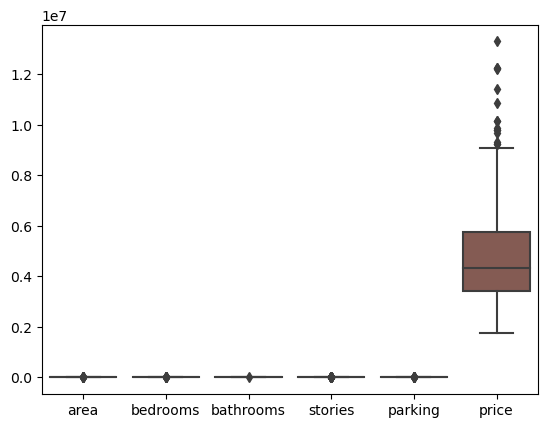

In [163]:
# using BoxPlot 
sns.boxplot(df)

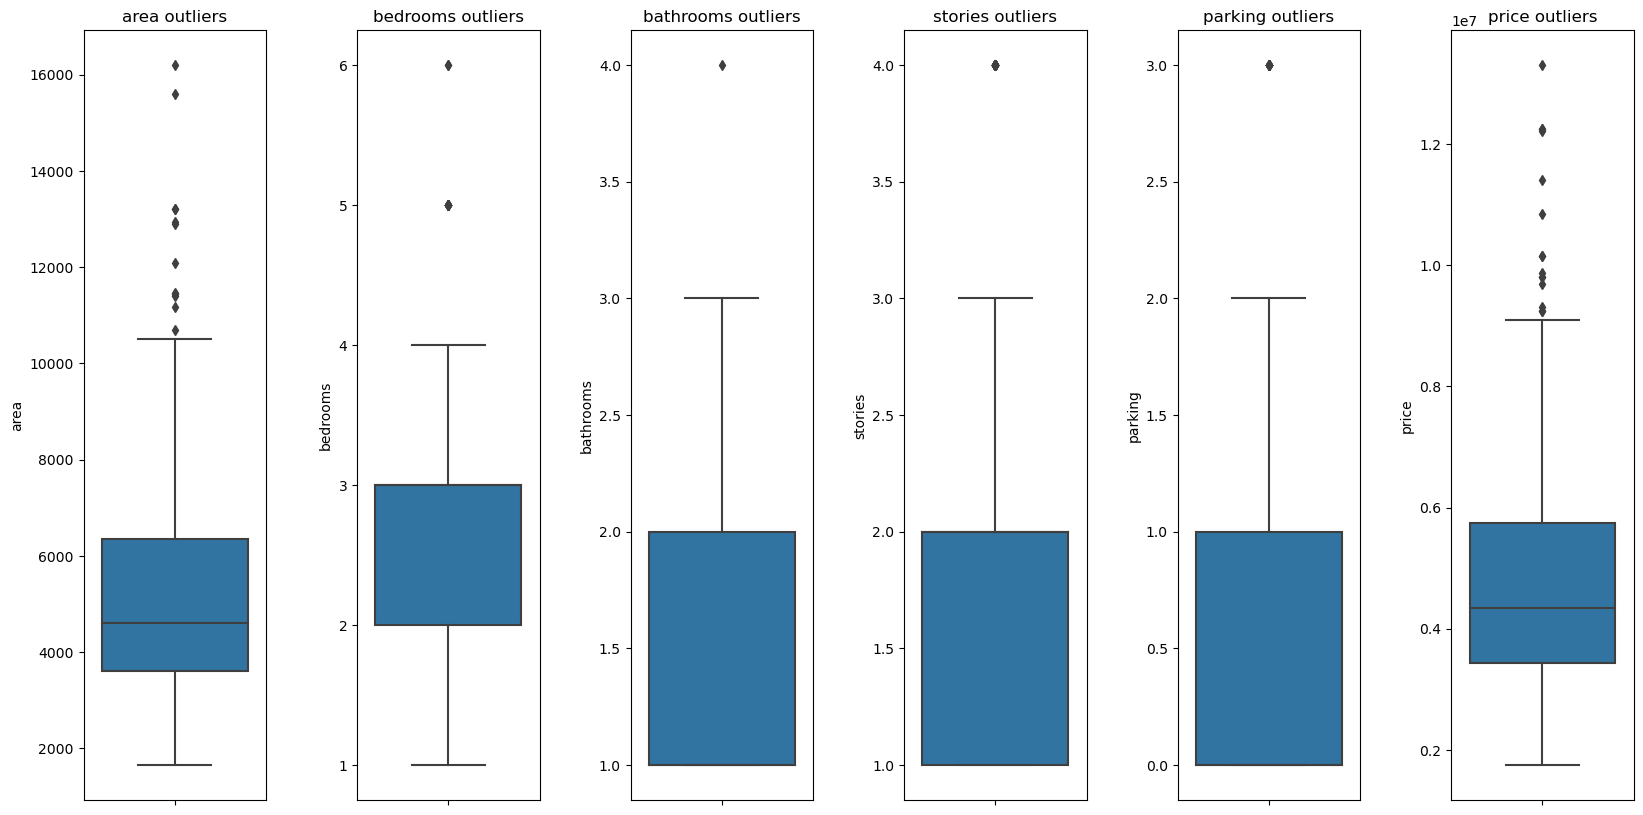

In [164]:
plt.figure(figsize=(20, 10))

for i,column in enumerate(df.select_dtypes("number").columns):
    plt.subplot(1,6,i+1)
    sns.boxplot(y=column, data=df)    
    plt.title(column + " outliers")
    
plt.subplots_adjust(hspace = 0.50, wspace = 0.5)    
plt.show()

**Notes:**
- *Bedrooms, bathrooms, stories,and parking features* outliers values are logical values and due to small numbers it's* *better to convert it to categoral types instead of removing or replacing outliers values*
- *area feature may contain outlier and it's better to replace its value with the upper limit*
- *Target column (Price) values will be kept as it is*

*to take final decicion before changing the dataset a plot diagram may be required*

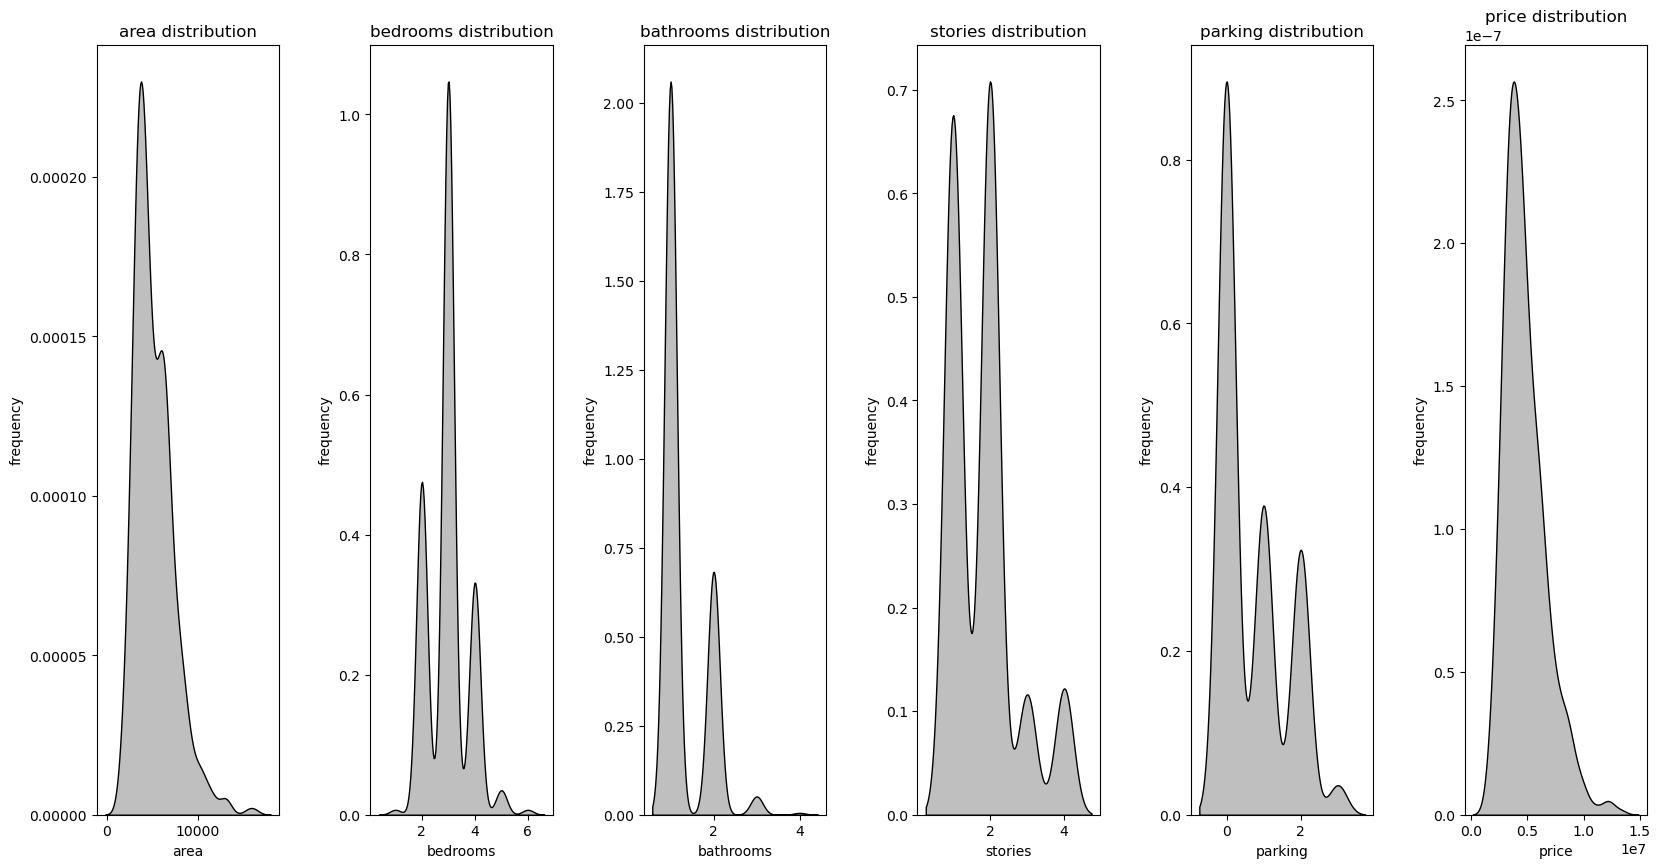

In [165]:
# Plot diagrams: data distribution

plt.figure(figsize= (20,10))
for i,column in enumerate(df.select_dtypes('number').columns):
    
    plt.subplot(1,6,i+1)
    sns.kdeplot(df[column], color="black", fill=True)    
    
    plt.title(column + " distribution")
    plt.xlabel(column)
    plt.ylabel("frequency")
    
plt.subplots_adjust(hspace = 0.50, wspace = 0.5)    
plt.show()

**Notes:**
- *from the figure above it's clearly objuous that bedrooms, bathrooms, stories, and parking features has more than one bill shape which means more than one phenomena and it's a categorical data type*
- *area feature is right tail but  most values is within the normal distribution and it's better to replace outliers with upper values or remove it*

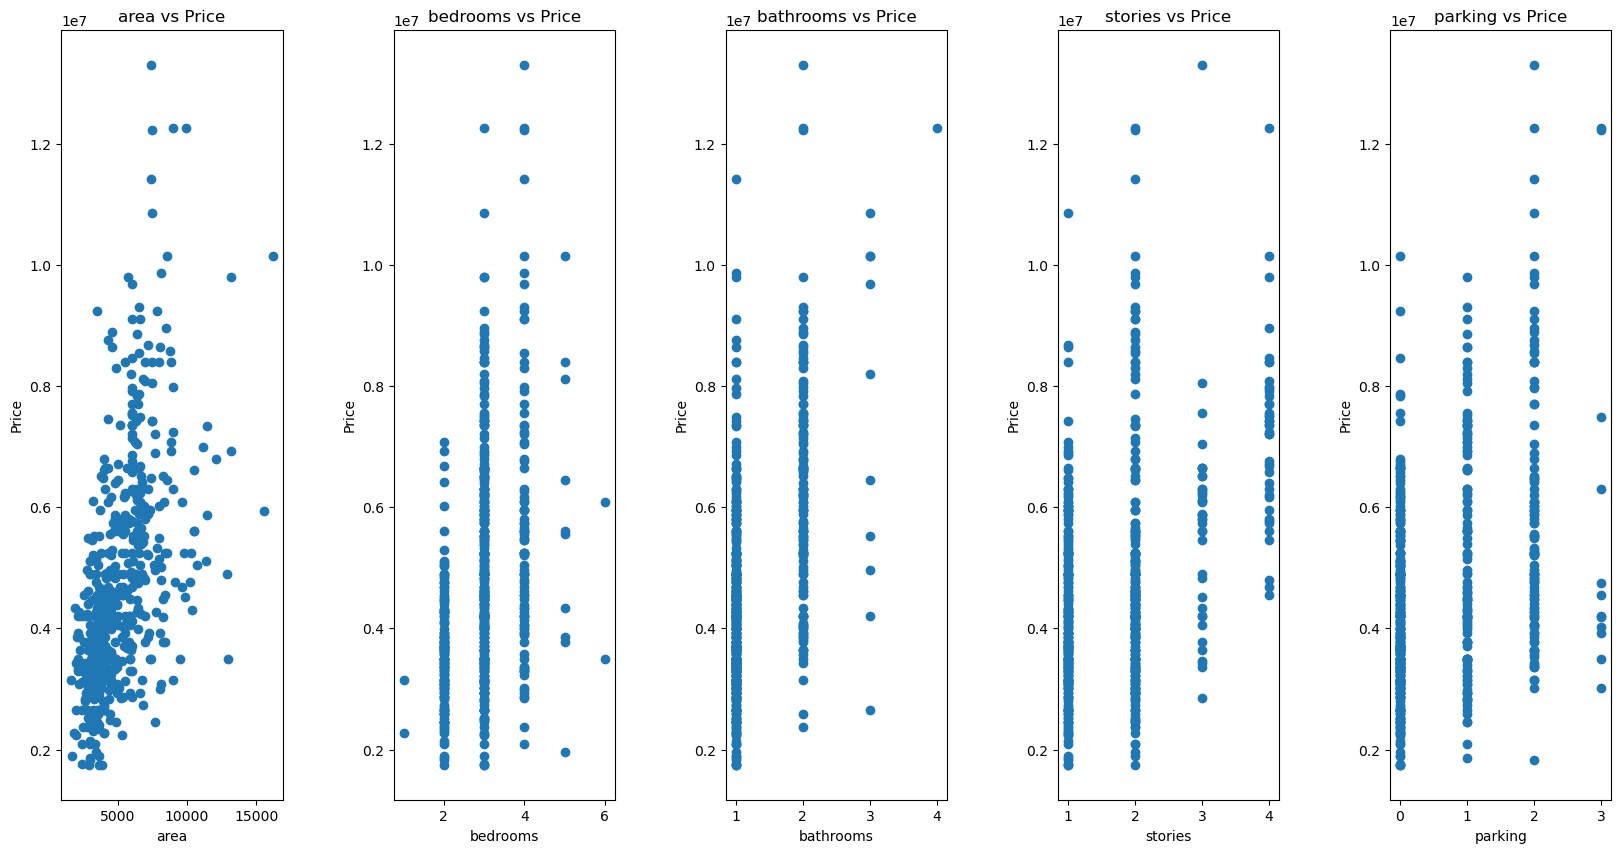

In [166]:
# Plot diagrams: scatter diagram

plt.figure(figsize= (20,10))
for i,column in enumerate(df.select_dtypes('number').columns[:-1]):
    
    plt.subplot(1,5,i+1)
    plt.scatter(df[column],df["price"])
    
    plt.title(f"{column} vs Price")
    plt.xlabel(column)
    plt.ylabel("Price")
    
plt.subplots_adjust(hspace = 0.50, wspace = 0.5)    
plt.show()

**Notes:**
- *from the figures above there is no relation between the price and bedrooms,bathrooms,stories,parking, which ensures that they are categorical features*
- *there is a linear relation between the area and the price, and there are values that may be outliers in the larger areas*

In [167]:
# changing [bedrooms,bathrooms,stories,parking] to categorical type
categ_columns = ["bedrooms","bathrooms","stories","parking"]
df[categ_columns] = df[categ_columns].astype("category")
ColumnsAnalysis()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
data_type,int64,category,category,category,category,category,category,category,category,category,category,category,int64
n_unique,284,6,4,4,2,2,2,2,2,4,2,3,219
null_count,0,0,0,0,0,0,0,0,0,0,0,0,0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
# replacing area column with upper and lower quartile values
print("minimum: {} , maximum: {}".format(df["area"].min(),df["area"].max()))

q1 = np.quantile(df["area"],0.25)
q3 = np.quantile(df["area"],0.75)
IQR = q3 - q1 
upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR
print("lower: {} , upper: {}".format(upper,upper))

upper_outliers = df[df["area"]>upper]["area"].values
df["area"] = df["area"].replace(upper_outliers, upper)

lower_outliers = df[df["area"]< lower]["area"].values 
df["area"] = df["area"].replace(lower_outliers, lower)

print("new minimum: {} , new maximum: {}".format(df["area"].min(),df["area"].max()))

minimum: 1650 , maximum: 16200
lower: 10500.0 , upper: 10500.0
new minimum: 1650 , new maximum: 10500


### Explore Categorical and Numerical Data
- Numerical data: scatter diagrams and correlation matrix
- categorical data: bar charts and heatmaps

In [169]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix

,area,price
area,1.000000,0.549576
price,0.549576,1.000000


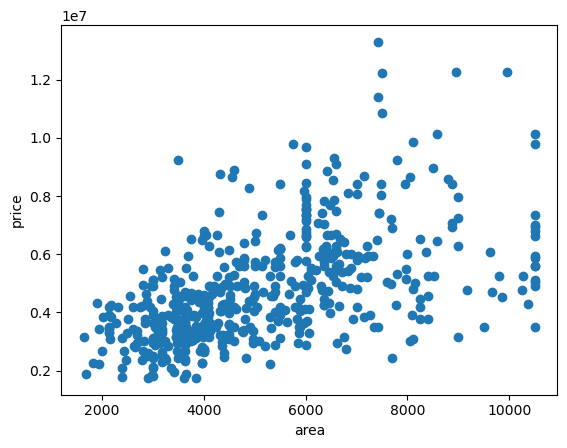

In [170]:
# scatter diagram
plt.scatter(df["area"],df["price"])
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [171]:
df.select_dtypes('category').columns

Index(['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

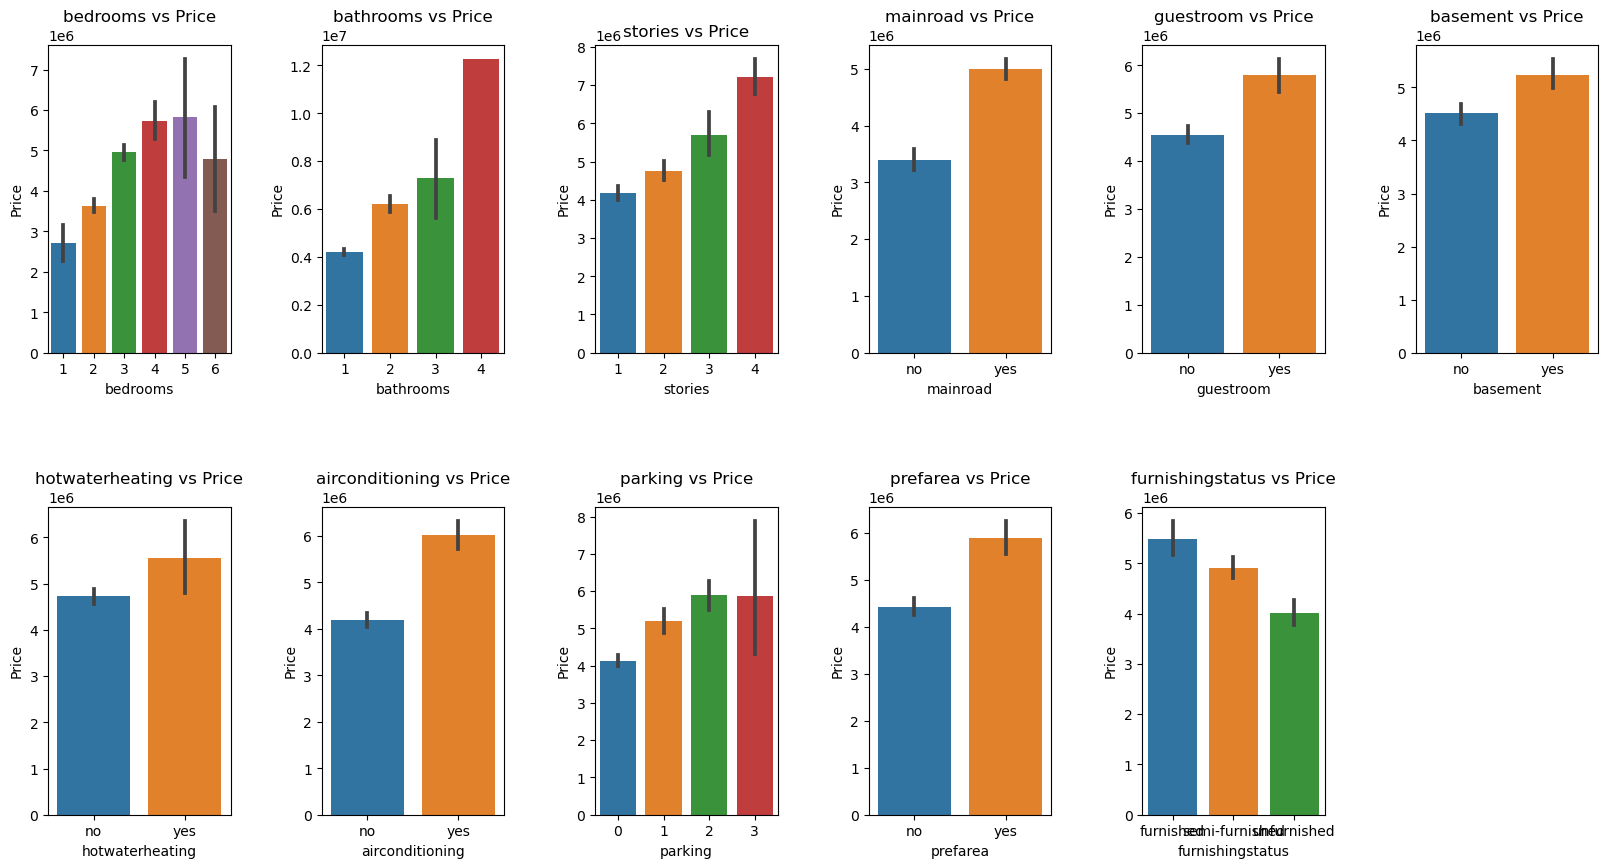

In [172]:
# bar charts
plt.figure(figsize= (20,10))
for i,column in enumerate(df.select_dtypes('category').columns):
    
    plt.subplot(2,6,i+1)
    sns.barplot(x=column, y='price', data=df) 
        
    plt.title(f"{column} vs Price")
    plt.xlabel(column)
    plt.ylabel("Price")
    
plt.subplots_adjust(hspace = 0.50, wspace = 0.5)    
plt.show()

**Notes:**
- *all categorical features are affecting the house price*

### Normalization

In [173]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.select_dtypes(include="number").columns[:-1].tolist()
numeric_cols
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df["area"].describe()

count    545.000000
mean       0.390085
std        0.226645
min        0.000000
25%        0.220339
50%        0.333333
75%        0.532203
max        1.000000
Name: area, dtype: float64

### Encoding

In [174]:
df["mainroad"].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [175]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

categ_label_col = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

for column in categ_label_col:
    df[column] = label_encoder.fit_transform(df[column])
    df[column] = df[column].astype("category")

ColumnsAnalysis()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
data_type,float64,category,category,category,category,category,category,category,category,category,category,category,int64
n_unique,273,6,4,4,2,2,2,2,2,4,2,3,219
null_count,0,0,0,0,0,0,0,0,0,0,0,0,0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.651977,4,2,3,1,0,0,0,1,2,1,0,13300000
1,0.825989,4,4,4,1,0,0,0,1,3,0,0,12250000
2,0.938983,3,2,2,1,0,1,0,0,2,1,1,12250000
3,0.661017,4,2,2,1,0,1,0,1,3,1,0,12215000
4,0.651977,4,1,2,1,1,1,0,1,2,0,0,11410000


In [180]:
df.shape

(545, 13)

### Exporting the final data to csv file

In [184]:
# this file will be used in the linear regression part
df.to_csv("Modified_Housing.csv")
df.shape

(545, 13)